# Method - 1

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
# Read the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/titanic-tested.csv")

In [3]:
# Drop rows with missing values
#data = data.dropna()

# Define features and target variable
features = ["Pclass", "Gender", "Age", "SibSp", "Embarked"]
target = "Survived"

In [4]:
# Encode categorical features
encoder = LabelEncoder()
for col in features:
  if data[col].dtype == object:
    data[col] = encoder.fit_transform(data[col])

# Scale numeric feature (Age)
scaler = StandardScaler()
data["Age"] = scaler.fit_transform(data[["Age"]])

In [5]:
# Separate features and target
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [6]:
# Create decision tree classifier
model = DecisionTreeClassifier()

# Train the model
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Print various classification metrics
print("\n\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n\nAccuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("\n\nClassification report:\n", metrics.classification_report(y_test, y_pred))

# Print the importance of each feature
print("\n\nFeature importances:")
for feature, importance in zip(features, model.feature_importances_):
  print(f"{feature}: {importance:.2f}")



Confusion Matrix:
 [[58  0]
 [ 0 26]]


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Feature importances:
Pclass: 0.00
Gender: 1.00
Age: 0.00
SibSp: 0.00
Embarked: 0.00


In [19]:

# Make predictions (commented out for now)
# Assuming you have a separate test dataset with similar structure as 'data'
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/titanic-tested.csv")  # Replace with your test data path


# Encode categorical features in the test data using the same encoder
for col in features:
  if test_data[col].dtype == object:
    # Ensure the encoder's classes are set from the training data
    # to handle potential new values in the test data.
    encoder.classes_ = np.append(encoder.classes_, test_data[col].unique())
    test_data[col] = encoder.fit_transform(test_data[col])

# Scale numeric feature (Age) in the test data using the same scaler
test_data["Age"] = scaler.transform(test_data[["Age"]])

predictions = model.predict(test_data[features])

# Save the tree as an image
# Three options

# Option 1 - Create a dot file and then convert manually to png format
# Save the tree as a DOT file
# pip install export_graphviz
with open("titanic_tree.dot", "w") as f:
 export_graphviz(model, out_file=f, feature_names=features, filled=True)

# You will then have to say dot -Tpng titanic_tree.dot -o titanic_tree.png to convert

# OR ... Search for "dot file editor" in google and open one ->
#    Paste the .dot file contents in that editor



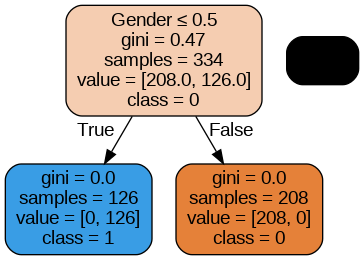

In [9]:
# Option 2 - Directly create a png file
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())


In [10]:
# Option 3: Also try to print it within the code itself
# pip install graphviz
import graphviz
dot_data = export_graphviz(model, out_file=None, feature_names = features,
           class_names=['0','1'], rounded = True, filled = True)

graph = graphviz.Source(dot_data)
graph.render ("decision-tree") # Will create a PDF file and open it
graph.view() # For Jupyter etc

'decision-tree.pdf'

# Metohd - 2

In [25]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/diabetes.csv", header=0, names=col_names)

print(pima.head())



In [26]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
#feature_cols = ['glucose', 'pedigree']

X = pima[feature_cols] # Features
print(X)
y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test



     pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns]


In [27]:
# Create Decision Tree classifier object
model = DecisionTreeClassifier()
# Train Decision Tree Classifier
model = model.fit(X_train,y_train)


In [28]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7077922077922078


In [29]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.